In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import pandas

In [4]:
# Lesen der Merkmale
featuresDf = pandas.read_csv("merkmale.csv")
featuresDf.describe()

,Zeitstempel,Breitengrad,Laengengrad,Geschwindigkeit,Messwerte,StartBewegungsD,StartBelichtung,Belichtungszeit,MittelX,MittelY,...,VarianzX,VarianzY,VarianzZ,VarianzNick,VarianzRoll,AbweichungX,AbweichungY,AbweichungZ,AbweichungNick,AbweichungRoll
count,4.033000e+03,4033.000000,4033.000000,4033.000000,4033.0,4.033000e+03,4.033000e+03,4.033000e+03,4033.000000,4033.000000,...,4033.000000,4033.000000,4033.000000,4033.000000,4033.000000,4033.000000,4033.000000,4033.000000,4033.000000,4033.000000
mean,1.520432e+12,53.614175,10.163583,13.797908,10.0,2.767638e+14,2.767639e+14,2.457690e+07,0.003357,0.005873,...,1.775910,11.933649,14.219520,0.149713,0.257838,1.054825,2.679763,2.940742,0.328067,0.291006
std,3.118401e+05,0.001194,0.014844,5.423002,0.0,3.118390e+11,3.118374e+11,5.764559e+06,0.463115,0.983133,...,4.195735,26.817699,29.858675,0.174804,0.742549,0.814505,2.180297,2.360708,0.205171,0.416169
min,1.520432e+12,53.610508,10.137785,0.000000,10.0,2.762160e+14,2.762161e+14,8.963045e+06,-3.123777,-8.407249,...,0.000100,0.000050,0.000140,0.000000,0.000000,0.010000,0.007070,0.011830,0.000000,0.000000
25%,1.520432e+12,53.613804,10.151080,11.520000,10.0,2.765011e+14,2.765012e+14,2.000368e+07,-0.224284,-0.415963,...,0.345590,2.103500,2.373990,0.033290,0.006390,0.587870,1.450340,1.540780,0.182460,0.079940
50%,1.520432e+12,53.614390,10.161076,15.264000,10.0,2.767615e+14,2.767615e+14,2.000368e+07,0.002862,0.004920,...,0.786830,4.865580,5.798350,0.085230,0.018030,0.887030,2.205810,2.407980,0.291940,0.134280
75%,1.520432e+12,53.615047,10.179163,17.352000,10.0,2.770310e+14,2.770311e+14,2.999632e+07,0.226910,0.422276,...,1.723130,10.606310,13.304090,0.196760,0.069060,1.312680,3.256730,3.647480,0.443580,0.262790
max,1.520433e+12,53.615852,10.185279,23.544000,10.0,2.773140e+14,2.773141e+14,2.999632e+07,4.367661,9.612721,...,111.032600,504.585710,403.466180,1.497310,8.279670,10.537200,22.462990,20.086470,1.223650,2.877440


In [10]:
featuresDf.Breitengrad.shape[0]

4033

In [384]:
accX = pandas.DataFrame(np.array(featuresDf.AccelerometerX.str.split(" ").tolist()).astype(float))
data = np.asarray([featuresDf.AbweichungX,featuresDf.AbweichungY,featuresDf.AbweichungZ])
data = scale(data)
data = data.T

In [396]:
y_pred = KMeans(n_clusters=8, max_iter=300, n_init=10).fit_predict(data)

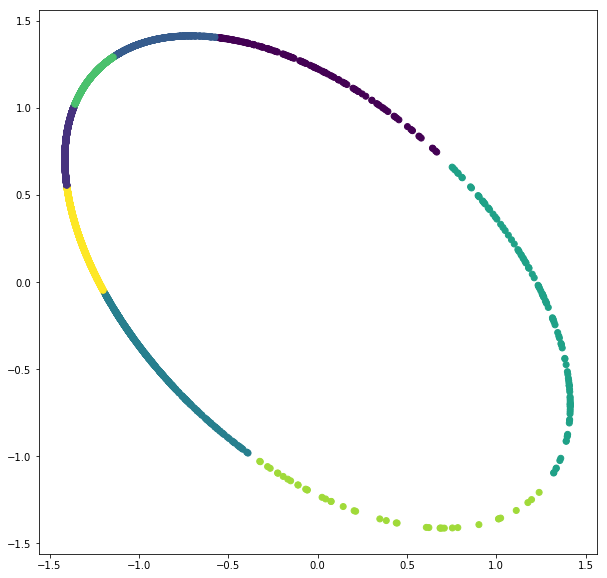

In [398]:
plt.figure(figsize=(10, 10))
plt.scatter(data[:,0],data[:,2],c=y_pred)

In [294]:
y_pred[80]

2